In [5]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

df = pd.read_csv('../funda-amsterdam.csv')
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


In [6]:
df_subset= df[['price','area', 'address']]
df_subset2= df_subset[(df_subset["price"]>20000) & (df_subset["area"] > 20) & df_subset['address']]
print(df_subset2)

        price  area                         address
0      510000   108       Knollendamstraat 4 III/IV
1      215000    47             Moerdijkstraat 47 1
2      325000   116               Zeeburgerdijk 349
3      315000    58          Brederodestraat 124 -1
4      200000    63  Admiraal De Ruijterweg 409 III
...       ...   ...                             ...
11438  599000   113            Olympiaplein 83 -III
11439  399000    88              Anjeliersstraat 20
11440  399000    77        Rustenburgerstraat 389 I
11441  259000    90         Doggersbankstraat 12 II
11442  165000    54       Anna van Burenstraat 24 2

[11079 rows x 3 columns]


Text(0.5, 1.0, 'correlation between price and surface area (in m2)')

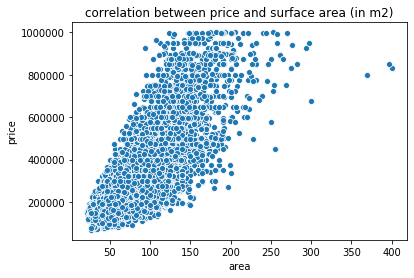

In [7]:
sns.scatterplot(x="area", y="price", data=df_subset2)
plt.title('correlation between price and surface area (in m2)')

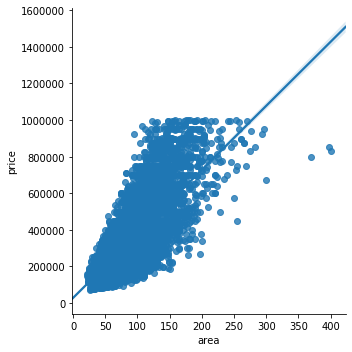

In [8]:
sns.lmplot(x="area", y="price", fit_reg=True, data=df_subset2)

In [9]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
x = df_subset2[['area']] 
y = df_subset2['price']
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model: minimize the size of the residuals 

b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X") #.0f formats to 2 decimals.

The regression line is equal to y = 27949.60 + 3499.15X


$  y = 27949.60 + 3499.15X $

In [10]:
print('Price prediction if the area = 70 m2')
lm.predict([[70]])

Price prediction if the area = 70 m2


array([272890.05112467])

In [11]:
df_subset2['price_p'] = lm.predict(x)
print(df_subset2)

        price  area                         address        price_p
0      510000   108       Knollendamstraat 4 III/IV  405857.725776
1      215000    47             Moerdijkstraat 47 1  192409.616468
2      325000   116               Zeeburgerdijk 349  433850.920439
3      315000    58          Brederodestraat 124 -1  230900.259130
4      200000    63  Admiraal De Ruijterweg 409 III  248396.005794
...       ...   ...                             ...            ...
11438  599000   113            Olympiaplein 83 -III  423353.472440
11439  399000    88              Anjeliersstraat 20  335874.739117
11440  399000    77        Rustenburgerstraat 389 I  297384.096455
11441  259000    90         Doggersbankstraat 12 II  342873.037783
11442  165000    54       Anna van Burenstraat 24 2  216903.661798

[11079 rows x 4 columns]


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Predicted price for Slichtenhorsttraat 10

In [12]:
for i, row in df_subset2.iterrows():
    if row['address'] == "Slichtenhorststraat 10":
        print('predicted price =', row['price_p'])
        print('residual =' , row['price'] - row['price_p'])

# Or: 
# house = df_subset2[df_subset2['address' == 'Slichtenhorststraat 10']]
# house.head()
# residual = house['price'] - house['price-p']

predicted price = 426852.6217730708
residual = -192352.62177307077


In [14]:
df_subset2['residual'] = df_subset2['price'] - df_subset2['price_p']
print(df_subset2.head())

    price  area                         address        price_p       residual
0  510000   108       Knollendamstraat 4 III/IV  405857.725776  104142.274224
1  215000    47             Moerdijkstraat 47 1  192409.616468   22590.383532
2  325000   116               Zeeburgerdijk 349  433850.920439 -108850.920439
3  315000    58          Brederodestraat 124 -1  230900.259130   84099.740870
4  200000    63  Admiraal De Ruijterweg 409 III  248396.005794  -48396.005794


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1, 'Plot of price and predicted price')

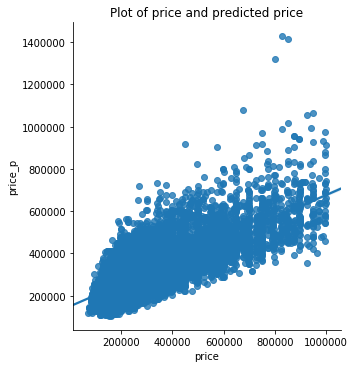

In [30]:
sns.lmplot(x="price", y="price_p",fit_reg=True, data=df_subset2)

plt.title('Plot of price and predicted price')

Text(0.5, 1, 'Plot of price and residual')

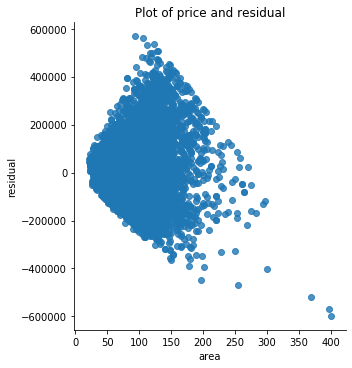

In [29]:
sns.lmplot(x="area", y="residual",fit_reg=False, data=df_subset2)

plt.title('Plot of price and residual')

In [23]:
from sklearn.metrics import r2_score
r2_score(df_subset2['price'], df_subset2['price_p']) #this gives the model fit (R2) for the Y and predicted Y

0.5256495795127099

The $R^2$ is 0.53, which means 53% of the variation in views is explained by the model.

In [27]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(df_subset2['price'], df_subset2['price_p'])) #this gives the model fit (R2) for the Y and predicted Y

118026.48885448951

RMSE = 118026 which means we are typically 118 thousand euros off

Fit is 53% which is not that great cause then a little over the half of it can be explained by the model. The houses that are cheap are predicted better as can be seen in the plot of price and predicted price (the dots are closer to the line when the prices are relatively low) The model has a big variance for middle class houses and a bias for the higher class houses.